### Creating health problem words list to verify the NLP model we created.

We worked on creating a NLP model to detect reviews about health issues from Amazon reviews. Here, we create verify data to confirm whether the detected results are really related to health problems and whether there are any omissions.  
FDA (The Food and Drug Administration) is responsible for protecting the public health by ensuring the safety, efficacy, and security of human and veterinary drugs, biological products, and medical devices; and by ensuring the safety of our nation's food supply, cosmetics, and products that emit radiation. A recall is a method of removing or correcting products that are in violation of laws administered by the FDA.   
Here, we have data on foods that have been recalled by the FDA in the past, together with recall reason statements. By extracting a word that has been referred to a plurality of times from among the words described in the recall reasoning sentence, it is possible to detect a word related to health in a review about food.

In [280]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import gensim
import collections
from afinn import Afinn
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

In [281]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/tajimakeijiro/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/tajimakeijiro/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [282]:
path_press_released = "../data/02_processed/FDA_press_released_2011_2019.csv"
path_enforced = "../data/02_processed/FDA_enforcements_2012-06_to_2019-10.csv"

In [283]:
df_press_released = pd.read_csv(path_press_released)
df_enforced = pd.read_csv(path_enforced, encoding = 'unicode_escape')

In [284]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

stop_words = set(stopwords.words('english')) 

# stemmer = PorterStemmer()

def process_text(sentence):
    token_words = nltk.word_tokenize(sentence)
    no_stopwords = [word.lower() for word in token_words if word not in stop_words and not \
                    all(c in string.punctuation for c in word) and not len(word) < 2]
    # return [stemmer.stem(word) for word in no_stopwords]
    return [(word) for word in no_stopwords]

print(process_text('I ordered spongbob slippers and I got John'))

['ordered', 'spongbob', 'slippers', 'got', 'john']


In [285]:
stemmed_press_released = df_press_released.copy()
stemmed_press_released['stemmed_Reason'] = stemmed_press_released['Reason'].astype(str).apply(lambda x : process_text(x))
stemmed_enforced = df_enforced.copy()
stemmed_enforced['stemmed_Reason.for.Recall'] = stemmed_enforced['Reason.for.Recall'].astype(str).apply(lambda x : process_text(x))

In [286]:
stemmed_press_released.head()

,Unnamed: 0,Date,Brand,ProductDescription,Reason,Company,Url,stemmed_Reason
0,0,"Sat, 31 Dec 2011 22:37:00 -0500","Let&#39;s Grow Healthy Together!, Green Valley...",Sprouts,Listeria monocytogenes,Green Valley Food Corp.,http://wayback.archive-it.org/7993/20170406200...,"[listeria, monocytogenes]"
1,1,"Sat, 31 Dec 2011 00:00:00 -0500",Edelweiss Creamery,cheese,Listeria monocytogenes,Alpine Slicing and Cheese Conversion,http://wayback.archive-it.org/7993/20170406200...,"[listeria, monocytogenes]"
2,2,"Sat, 31 Dec 2011 00:00:00 -0500",Brennan&#39;s Cellars,Cheese,Listeria monocytogenes,Alpine Slicing and Cheese Conversion,http://wayback.archive-it.org/7993/20170406200...,"[listeria, monocytogenes]"
3,3,"Fri, 30 Dec 2011 00:00:00 -0500",Martinelli&#39;s Gold Medal,Sparkling Cider,Defective Seal,S. Martinelli &amp; Company,http://wayback.archive-it.org/7993/20170406200...,"[defective, seal]"
4,4,"Fri, 30 Dec 2011 00:00:00 -0500",Organique by Himalaya,Night Cream,staphylococcus aureus and fungus,HimalayaUSA,http://wayback.archive-it.org/7993/20170406200...,"[staphylococcus, aureus, fungus]"


In [287]:
stemmed_enforced.head()

,Product.Type,Recently.Updated.Record,Last.Modified.Date,Event.ID,Status,Recalling.Firm,Address1,Address2,City,State.Province,...,Product.Description,Product.Quantity,Reason.for.Recall,Recall.Initiation.Date,Center.Classification.Date,Termination.Date,Report.Date,Code.Info,More.Code.Info,stemmed_Reason.for.Recall
0,Food,No,NaN,66563,Terminated,"Reser's Fine Foods, Inc.",15570 SW Jenkins Road,NaN,Beaverton,OR,...,"Macaroni Reg CAD, Formula MA.50, Macaroni Sal...",NaN,The recalled products are potentially contamin...,10/22/2013,12/24/2013,01/24/2017,01/01/2014,Use by dates: 10/21/13-12/11/13.,NaN,"[the, recalled, products, potentially, contami..."
1,Food,No,NaN,66563,Terminated,"Reser's Fine Foods, Inc.",15570 SW Jenkins Road,NaN,Beaverton,OR,...,"Reser's Fine Foods, Cheesy Macaroni Salad, For...",NaN,The recalled products are potentially contamin...,10/22/2013,12/24/2013,01/24/2017,01/01/2014,Use by date 10/20/13 and 12/01/13.,NaN,"[the, recalled, products, potentially, contami..."
2,Food,No,NaN,66563,Terminated,"Reser's Fine Foods, Inc.",15570 SW Jenkins Road,NaN,Beaverton,OR,...,"Reser's Fine Foods, Potato Salad, Formula PO.9...",NaN,The recalled products are potentially contamin...,10/22/2013,12/24/2013,01/24/2017,01/01/2014,Use by date 10/23/13-12/09/13.,NaN,"[the, recalled, products, potentially, contami..."
3,Food,No,NaN,66563,Terminated,"Reser's Fine Foods, Inc.",15570 SW Jenkins Road,NaN,Beaverton,OR,...,"Potato Salad with Egg, Formula PO.71, packaged...",NaN,The recalled products are potentially contamin...,10/22/2013,12/24/2013,01/24/2017,01/01/2014,Use by date 10/20/13 - 12/12/13.,NaN,"[the, recalled, products, potentially, contami..."
4,Food,No,NaN,66563,Terminated,"Reser's Fine Foods, Inc.",15570 SW Jenkins Road,NaN,Beaverton,OR,...,"Potato Salad with Deviled Egg, Formula PO.16, ...",NaN,The recalled products are potentially contamin...,10/22/2013,12/24/2013,01/24/2017,01/01/2014,Use by date 10/13/2013 - 11/15/13.,NaN,"[the, recalled, products, potentially, contami..."


In [288]:
# Define a function that flatten one column into a list
def flatten(nested_list):
    return [e for inner_list in nested_list for e in inner_list]

In [289]:
# Make lists of reason sentences in the press released dataset and the enforced dataset

l_stemmed_press_released = stemmed_press_released['stemmed_Reason'].values.tolist()
l_stemmed_press_released = flatten(l_stemmed_press_released)

l_stemmed_enforced = stemmed_enforced['stemmed_Reason.for.Recall'].values.tolist()
l_stemmed_enforced = flatten(l_stemmed_enforced)

In [290]:
# Count how many times each word appears in these words lists.
# Remove words that have less than two characters.

press_released_sorted = collections.Counter(l_stemmed_press_released).most_common()
enforced_sorted = collections.Counter(l_stemmed_enforced).most_common()

# Sort these two lists by count
words_press_released_sorted = [word for word, count in press_released_sorted if len(word)>2]
words_enforced_sorted = [word for word, count in enforced_sorted if len(word)>2]

In [330]:
# With using wordcloud library, make a function visualizes the words in these two lists

stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 
    ).generate(str(data))
    
    fig = plt.figure(1, figsize=(8, 8))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

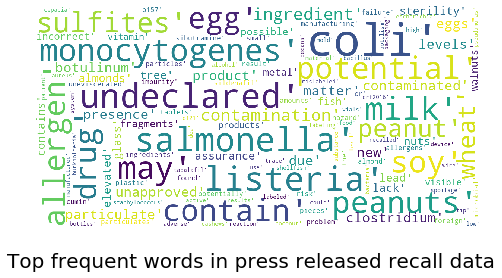

In [331]:
# Visualize the top 200 frequent words in the press released reason sentenses
show_wordcloud(words_press_released_sorted[:200], title = "Top frequent words in press released recall data")

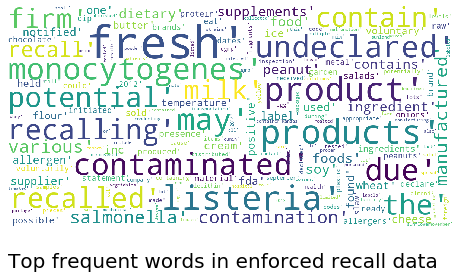

In [332]:
# Visualize the top 200 frequent words in the enforced reason sentenses
show_wordcloud(words_enforced_sorted[:200], title = "Top frequent words in enforced recall data")

Here, we got words lists from both the press released dataset and the enforced dataset. We can see that these words strongly connect to health problems.  
Then, in these lists, there might be some usuless words that appear few times. Let's check these words and delete them.

In [333]:
# Count all of the words in each list
counts_press_released = pd.Series([count for word, count in press_released_sorted if len(word)>2])
counts_enforced = pd.Series([count for word, count in enforced_sorted if len(word)>2])

Text(0.5, 1.0, 'Histogram of counts of words appear in the enforced dataset')

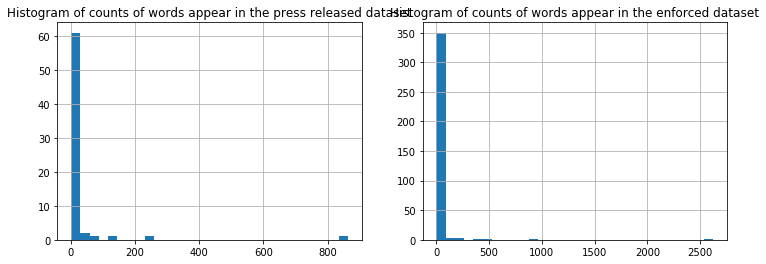

In [334]:
# Plot the histograms of word counts in each list
plt.figure(figsize=(12, 4))

plt.subplot(1,2,1)
counts_press_released.value_counts().hist(bins=30)
plt.title("Histogram of counts of words appear in the press released dataset")

plt.subplot(1,2,2)
counts_enforced.value_counts().hist(bins=30)
plt.title("Histogram of counts of words appear in the enforced dataset")

In [335]:
print("The ratio of words that appear only once in words_press_released_sorted is {:.1f}%".format(counts_press_released.value_counts()[1]/len(words_press_released_sorted)*100))
print("The ratio of words that appear only once in words_enforced_sorted is {:.1f}%".format(counts_enforced.value_counts()[1]/len(words_enforced_sorted)*100))

The ratio of words that appear only once in words_press_released_sorted is 55.6%
The ratio of words that appear only once in words_enforced_sorted is 36.3%


In [336]:
# Let's see inside the press released  word list with specified word count 2 & 3
words_press_released_3 = [word for word, count in press_released_sorted if count==3 if len(word)>2]
words_press_released_4 = [word for word, count in press_released_sorted if count==4 if len(word)>2]

In [344]:
# Let's see inside the enforced word list with specified word count 5 & 10
words_enforced_5 = [word for word, count in enforced_sorted if count==5 if len(word)>2]
words_enforced_10 = [word for word, count in enforced_sorted if count==10 if len(word)>2]
words_enforced_15 = [word for word, count in enforced_sorted if count==15 if len(word)>2]

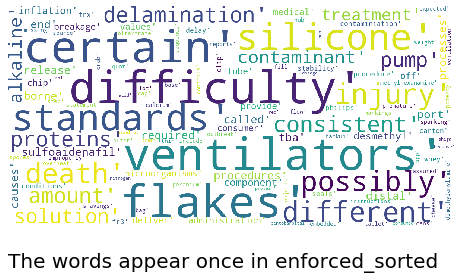

In [345]:
show_wordcloud(words_press_released_3, title = "The words appear once in enforced_sorted")

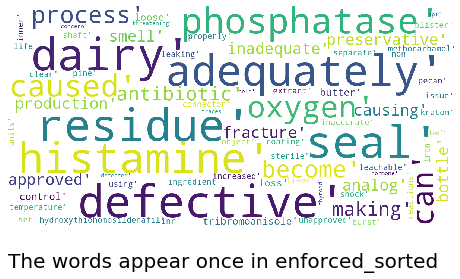

In [346]:
show_wordcloud(words_press_released_4, title = "The words appear once in enforced_sorted")

Here, from count more than 4, the useless words ratio like "become" and "process" is small. (When we increase the minimum count like 10, we still have some useless words, so we analyzed compromise point to get useful health words.)

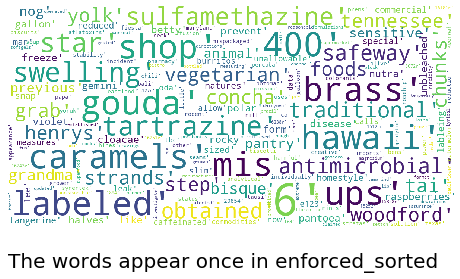

In [347]:
show_wordcloud(words_enforced_5, title = "The words appear once in enforced_sorted")

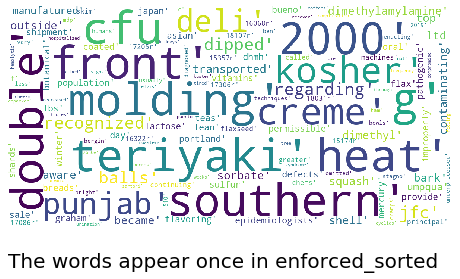

In [348]:
show_wordcloud(words_enforced_10, title = "The words appear once in enforced_sorted")

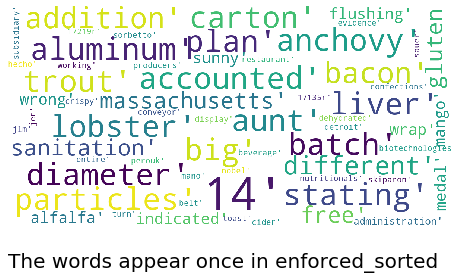

In [349]:
show_wordcloud(words_enforced_15, title = "The words appear once in enforced_sorted")

Here, from count more than 15, the useless words ratio like "14" and "massachusetts" is small. (When we increase the minimum count like 20, we still have some useless words, so we analyzed compromise point to get useful health words.)

In [350]:
frequent_words_press_released = [word for word, count in press_released_sorted if count >= 4 if len(word)>2]
frequent_words_enforced = [word for word, count in enforced_sorted if count >= 30  if len(word)>2]

In [351]:
path_amazon = "../cleaned_reviews.json" 
df_reviews = pd.read_json(path_amazon, lines=True)
df_reviews.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A1ZQZ8RJS1XVTX,0657745316,gsxrgirl,"[0, 0]","No sugar, no GMO garbage, no fillers that come...",5,Best vanilla I've ever had,1381449600,"10 11, 2013"
1,A31W38VGZAUUM4,0700026444,FIFA Lvr,"[1, 1]","This is my absolute, undisputed favorite tea r...",5,Terrific Tea!,1354752000,"12 6, 2012"
2,A3I0AV0UJX5OH0,1403796890,Alicia b,"[0, 0]",I ordered spongbob slippers and I got John Cen...,1,grrrrrrr,1385942400,"12 2, 2013"
3,A3QAAOLIXKV383,1403796890,"Danny K. Tilley ""Dan Tilley""","[0, 0]",The cart is fine and works for the purpose for...,3,Storage on Wheels Cart,1307836800,"06 12, 2011"
4,AB1A5EGHHVA9M,141278509X,CHelmic,"[1, 1]",This product by Archer Farms is the best drink...,5,The best drink mix,1332547200,"03 24, 2012"


In [352]:
#Download stopwords and wordnet for lemmatization (only need to be executed once)
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/tajimakeijiro/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/tajimakeijiro/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [353]:
reviews = df_reviews

#TBD: Which columns to keep/remove
reviews = reviews.drop(columns=['reviewerName', 'helpful', 'reviewTime'])

#Convert the utc timestamp to readable dates
reviews['unixReviewTime'] = pd.to_datetime(reviews['unixReviewTime'],unit='s')

reviews.head()

,reviewerID,asin,reviewText,overall,summary,unixReviewTime
0,A1ZQZ8RJS1XVTX,0657745316,"No sugar, no GMO garbage, no fillers that come...",5,Best vanilla I've ever had,2013-10-11
1,A31W38VGZAUUM4,0700026444,"This is my absolute, undisputed favorite tea r...",5,Terrific Tea!,2012-12-06
2,A3I0AV0UJX5OH0,1403796890,I ordered spongbob slippers and I got John Cen...,1,grrrrrrr,2013-12-02
3,A3QAAOLIXKV383,1403796890,The cart is fine and works for the purpose for...,3,Storage on Wheels Cart,2011-06-12
4,AB1A5EGHHVA9M,141278509X,This product by Archer Farms is the best drink...,5,The best drink mix,2012-03-24


In [354]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

stop_words = set(stopwords.words('english')) 

# Here we don't need stemming, because Afinn has same score for the before stemmed ones.
# stemmer = PorterStemmer()

def process_text(sentence):
    token_words = nltk.word_tokenize(sentence)
    no_stopwords = [word.lower() for word in token_words if word not in stop_words and not \
                    all(c in string.punctuation for c in word) and not len(word) < 2]
    # return [stemmer.stem(word) for word in no_stopwords]
    return [(word) for word in no_stopwords]

print(process_text('I ordered spongbob slippers and I got John'))

['ordered', 'spongbob', 'slippers', 'got', 'john']


In [355]:
stemmed = reviews.copy()
stemmed = stemmed[stemmed['overall'] < 3]
stemmed['reviewStemmed'] = stemmed['reviewText'].apply(lambda x : process_text(x))

stemmed.head()

,reviewerID,asin,reviewText,overall,summary,unixReviewTime,reviewStemmed
2,A3I0AV0UJX5OH0,1403796890,I ordered spongbob slippers and I got John Cen...,1,grrrrrrr,2013-12-02,"[ordered, spongbob, slippers, got, john, cena,..."
5,A3DTB6RVENLQ9Q,1453060375,Don't buy this item - rip off at this price. ...,1,Oops. Made a mistake and ordered this. I mis...,2013-03-03,"[do, n't, buy, item, rip, price, my, bad, mist..."
46,A3KJ9TZ2HLL7SA,5901002482,I wrote an earlier scathing review of this pro...,1,Packaging problem,2012-11-28,"[wrote, earlier, scathing, review, product, wh..."
48,ACEL2LY99MAB0,6162362183,I read the reviews before I bought it. It got ...,2,Very disappointed.,2014-04-21,"[read, reviews, bought, it, got, excited, revi..."
61,A2F3CK8F9VIFPL,616719923X,I bought it because i like green tea but the t...,1,Yuck,2013-07-29,"[bought, like, green, tea, taste, bad, came, m..."


In [356]:
stemmed['FDA_press_released'] = stemmed['reviewStemmed'].apply(lambda x: [i for i in x if i in frequent_words_press_released])
stemmed['FDA_enforced'] = stemmed['reviewStemmed'].apply(lambda x: [i for i in x if i in frequent_words_enforced])

In [357]:
stemmed.head()

,reviewerID,asin,reviewText,overall,summary,unixReviewTime,reviewStemmed,FDA_press_released,FDA_enforced
2,A3I0AV0UJX5OH0,1403796890,I ordered spongbob slippers and I got John Cen...,1,grrrrrrr,2013-12-02,"[ordered, spongbob, slippers, got, john, cena,...",[],"[ordered, ordered]"
5,A3DTB6RVENLQ9Q,1453060375,Don't buy this item - rip off at this price. ...,1,Oops. Made a mistake and ordered this. I mis...,2013-03-03,"[do, n't, buy, item, rip, price, my, bad, mist...",[bottle],"[item, quantity, per, bottle]"
46,A3KJ9TZ2HLL7SA,5901002482,I wrote an earlier scathing review of this pro...,1,Packaging problem,2012-11-28,"[wrote, earlier, scathing, review, product, wh...","[product, product, problem]","[product, received, product, boxes, tea, boxes..."
48,ACEL2LY99MAB0,6162362183,I read the reviews before I bought it. It got ...,2,Very disappointed.,2014-04-21,"[read, reviews, bought, it, got, excited, revi...","[package, package]","[good, package, crunch, two, package, made]"
61,A2F3CK8F9VIFPL,616719923X,I bought it because i like green tea but the t...,1,Yuck,2013-07-29,"[bought, like, green, tea, taste, bad, came, m...",[],"[green, tea, taste, came]"


Eventually, from the Amazon review , we were able to extract the most frequent words listed as the reason for recall in FDA datasets. On the other hand, even if they are not related to food problems, there are some words that appear frequently in the recall reasons. Especially for the FDA_enforced, we got so many useless words. This couldn't be solved by increasing the minimum count. The next step will be to consider how to remove them.